# Part II - European Values Study 1999
## by Ferdawes Haouala

## Investigation Overview

> I wanted to help international recruiter to know some caracterestics about employees in general (the reason of their satisfaction, how much they give importance to work) and then I tried to explain this basic 2 variables with other varibales like country, age, sex, life satisfaction

## Dataset Overview

> This dataset is the answer of 4857 random person under the concept of the european value study survey. I focused on their answerw to work related questions and their demographics


In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
#Load the clean dataset
df_new = pd.read_csv('EVS_1999.csv',index_col=0)

## The age distribution of respondants 

What I would like to start with is the age of people who answered this survey 
because the recruiter has a specific age range that he is intrested with 

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

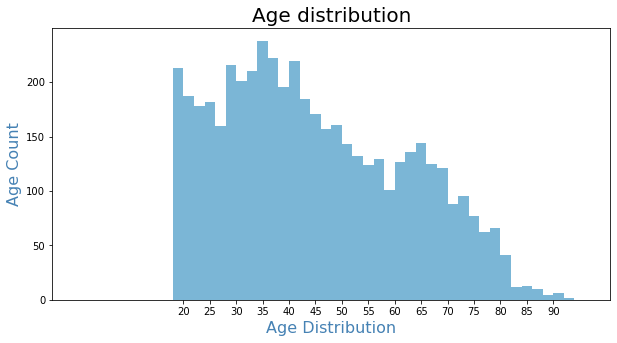

In [9]:
#Plot age distribution
#remove the space from 0 on the y axes to 20 on the xaxix
plt.figure(figsize = [10, 5]) 

bins = np.arange(0, df_new['age'].max()+4, 2)
ticks = np.arange(20,95,5)
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_new, x = 'age', bins = bins,color=sns.color_palette("RdBu", 10)[-3]);
plt.xticks(ticks, labels)
plt.xlabel('Age Distribution', fontsize=16,color='steelblue')
plt.ylabel('Age Count', fontsize=16,color='steelblue' )
plt.title('Age distribution', fontsize=20)
plt.show();

## Work satisfaction by age

> can we know which category of age is more satisfied with its work?

In [11]:
#we are going to create age category
category_age = []
for i in df_new.age:
    if i>70 :
        category_age.append('more than 70')
    elif i>50 and i<= 70:
        category_age.append('Between 50 and 70')
    elif i>30 and i<=50 :
        category_age.append('Between 30 and 50')
    elif i>18 and i<=30 :
        category_age.append('Between 18 and 30')
    else:
        category_age.append('None')
df_new['category_age'] = category_age

<Figure size 2880x1440 with 0 Axes>

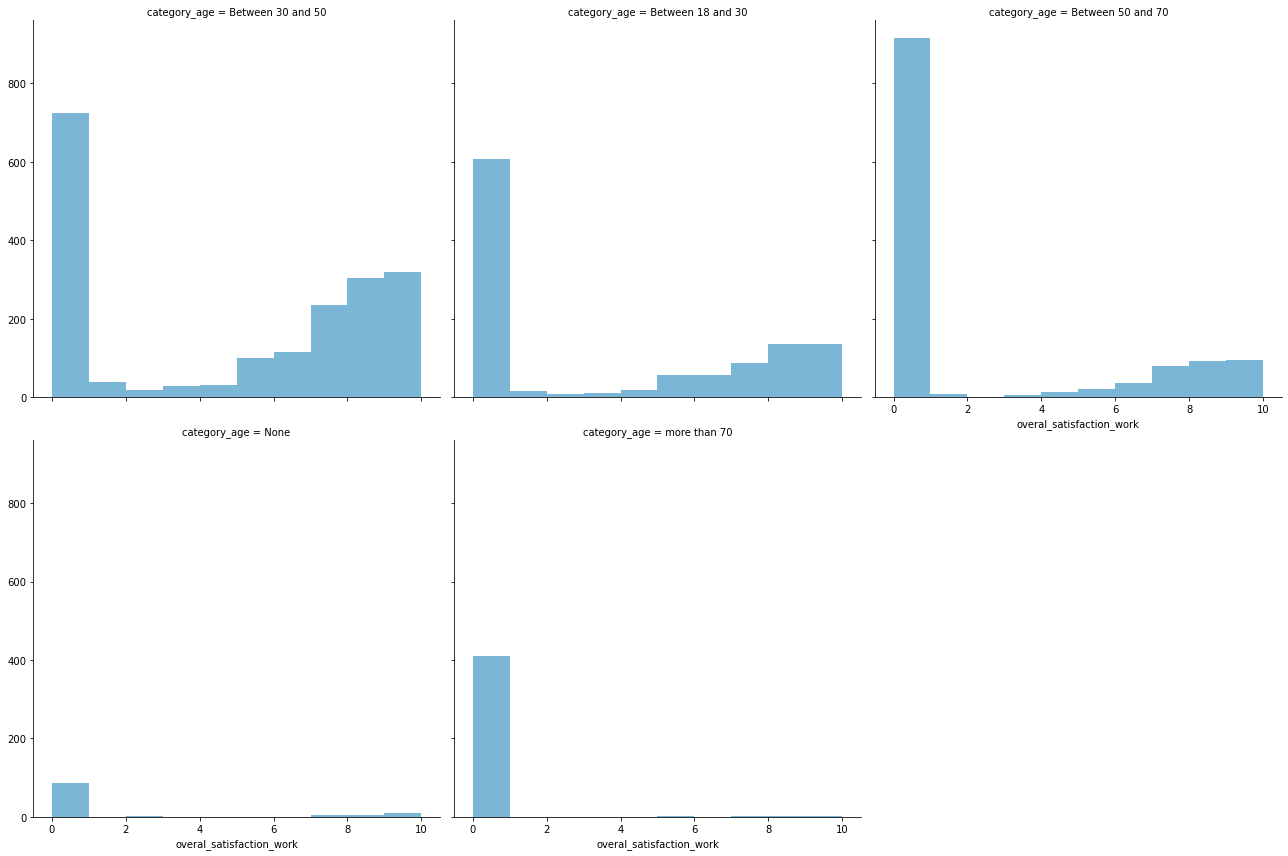

In [31]:
plt.figure(figsize = [40, 20]) ;
bins = np.arange(0,11,1);
g = sns.FacetGrid(data = df_new, col = 'category_age' ,height=6,col_wrap=3);
g.map(plt.hist,"overal_satisfaction_work",bins=bins, color= sns.color_palette("RdBu", 10)[-3]);
plt.show();


##  Is there a relationship between work importance, work satisfaction, sex and life satisfaction

Let's further explore the reasons of satisfaction
what is the effect of life satisfaction on work satisfaction


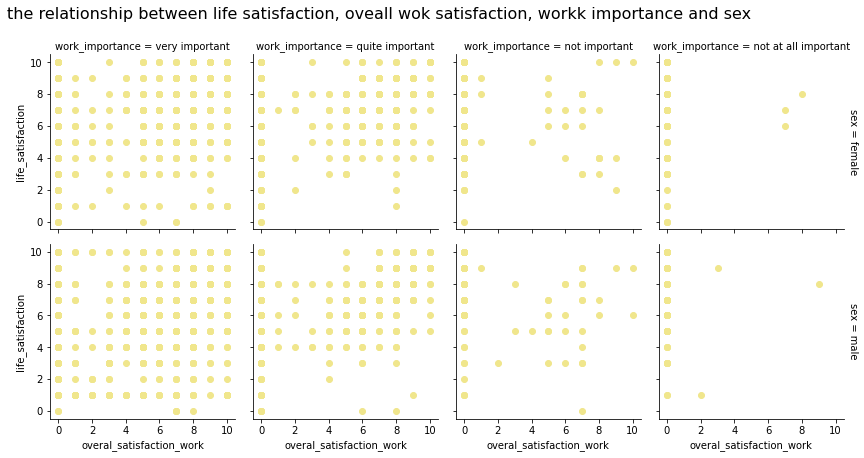

In [32]:
g = sns.FacetGrid(data = df_new, col ='work_importance' , row = 'sex', height = 3,
                margin_titles = True)
g.map(plt.scatter, 'overal_satisfaction_work', 'life_satisfaction',color='khaki');
plt.title('the relationship between life satisfaction, oveall wok satisfaction, workk importance and sex' 
          , fontsize = 16 , y=2.25,horizontalalignment='right');
plt.show();

> What makes your epmolyees satisfied : maybe life satisfaction 

>importance to work may not lead to satisfaction for employees

## Is there a relationship between work importance, sex and work satisfaction?
let's see whether sex and work importance has an effect on work satisfaction



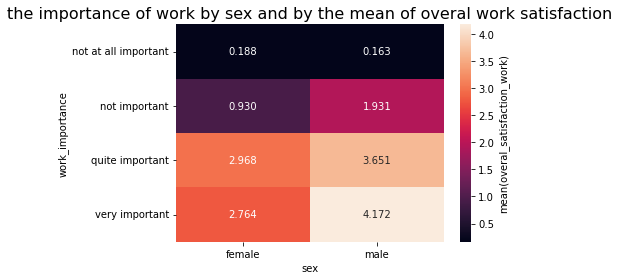

In [34]:
average = df_new.overal_satisfaction_work.mean()

cat_means = df_new.groupby(['sex', 'work_importance']).mean()['overal_satisfaction_work']
cat_means = cat_means.reset_index(name = average)
cat_means = cat_means.pivot(index = 'work_importance', columns = 'sex',
                            values = average)
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(overal_satisfaction_work)'})
plt.title('the importance of work by sex and by the mean of overal work satisfaction', fontsize=16)
plt.show();

> How to recruit employees that become satisfied and may pay more importance to work : maybe based on gender (male)

## Do all male find work as important : relationship between sex, work importance and work satisfaction

if you are searching for other reasons to make your male employees come to you other than 'work impotance' look at this graph



In [ ]:
g = sns.FacetGrid(data = df_new, col ='work_importance' , row = 'sex', height = 3,
                margin_titles = True)
g.map(plt.scatter, 'overal_satisfaction_work', 'free_to_choose',color='khaki');
plt.title('the relationship between work importance,overal_satisfaction_work, free_to_choose and sex' 
          , fontsize = 16 , y=2.25,horizontalalignment='right');
plt.show();

> How to recruit employees that become satisfied and may pay more importance to work : maybe based on freedom of choice of males

       because there are men who don't see work as important but they get more and more satisfied with work the more freedom                                             of choice they get

## relationship between work importance, work satisfaction and gender
Like you saw in the previous graph work importance and work satisfaction are not linked 
let's see other explanation



In [ ]:
#does religion impact work satisfaction, work importance, overall satisfaction
plt.figure(figsize = [10, 5]) 
ax = sns.barplot(data = df_new, x = 'work_importance', y = 'overal_satisfaction_work', hue = 'sex',
                 order=['very important','quite important','not important','not at all important'])
ax.legend(title = 'religion_importance')

plt.show();

>importance to work may not lead to satisfaction for employees

this graph show how work importance can be high but work satisfaction is under 4
this graph also shows clearly how male are more satisfied with their work then females (our previous conclusion)

## relationship between country, work satisfaction and gender
if it is confirmed that life satisfaction leads to work satisfaction here is a graph that will help you choose what country to recruit from as an international recruiter



In [36]:
#creating proportions
totals_countries = df_new.country.value_counts()
satfis_country = df_new.groupby('country')['life_satisfaction'].value_counts()
#calculating proportions
france_prop =satfis_country['France']/totals_countries['France']
Germany_prop =satfis_country['Germany']/totals_countries['Germany']
Turkey_prop =satfis_country['Turkey']/totals_countries['Turkey']

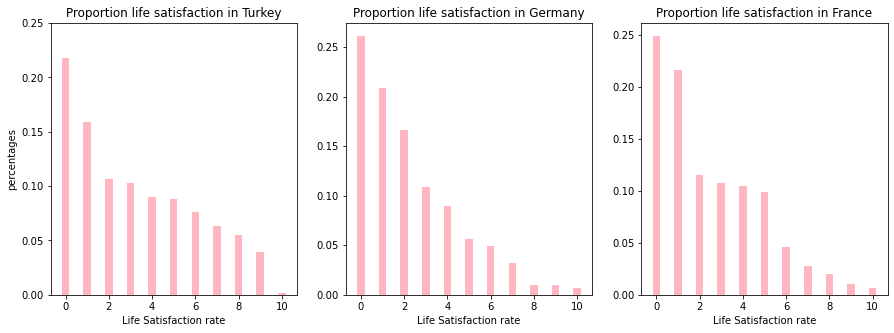

In [37]:
fig, axes = plt.subplots(1, 3) 
axes = axes.flatten()
fig.set_figheight(5)
fig.set_figwidth(15)


plt.subplot(1, 3, 1) 

ticks = np.arange(0,11,1)
plt.bar(ticks, Turkey_prop,width = 0.35,color='lightpink' );
plt.ylim(top=0.25)
plt.ylabel('percentages')
plt.xlabel('Life Satisfaction rate')
plt.title('Proportion life satisfaction in Turkey')


plt.subplot(1, 3, 2) 
plt.bar(ticks, Germany_prop,width = 0.35,color='lightpink');
plt.xlabel('Life Satisfaction rate')
plt.title('Proportion life satisfaction in Germany')

plt.subplot(1, 3, 3) 
plt.bar(ticks, france_prop,width = 0.35,color='lightpink');
plt.xlabel('Life Satisfaction rate')
plt.title('Proportion life satisfaction in France')

plt.show();

>Turkey has less unsatisfaction life rate and higher life satisfaction rate 

# Thank you for your attention !

In [39]:
# Use this command to generate slides 
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\envs\dataanalysis\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\lenovo\anaconda3\envs\dataanalysis\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\lenovo\anaconda3\envs\dataanalysis\Scripts\jupyter-nbconvert.EXE\__main__.py", line 4, in <module>
  File "C:\Users\lenovo\anaconda3\envs\dataanalysis\lib\site-packages\nbconvert\__init__.py", line 3, in <module>
    from . import filters, postprocessors, preprocessors, writers
  File "C:\Users\lenovo\anaconda3\envs\dataanalysis\lib\site-packages\nbconvert\filters\__init__.py", line 5, in <module>
    from .datatypefilter import *
  File "C:\Users\lenovo\anaconda3\envs\dataanalysis\lib\site-packages\nbconvert\filters\datatypefilter.py", line 22, in <module>
    from ..utils.base import NbConvertBase
  File "C:\Users\lenovo\anaconda3\envs\dataanalysis\lib\site-packages\nbconve